In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib import animation
from matplotlib.animation import FuncAnimation

#### Length of the scheme

In [19]:
#length of the scheme, now fixed to 1000
t = np.linspace(-20, 50, 1000)
#step in time δt :
#δt=1

### Pulse function and Pulses:

In [50]:
def p(A,t,Δ):
    """Primitive rectangular pulse, A gives the amplitude, t should be evaluated over the array of time, Δ corresponds to the with of the pulse"""
    return A * (abs(t) < Δ/2)

In [40]:
def P(Pulse,t):
    """Primitive rectangular pulse, A gives the amplitude, t should be evaluated over the array of time, Δ corresponds to the with of the pulse"""
    Δ=(Pulse['Duration'])/2
    
    return Pulse['Amplitude'] * ( abs(t) <  Δ  )

In [11]:
def duration(Pulse,time):
    "creates an array with the same time step as the time interval, but only for the duration of the pulse"
    du = time[time <= Pulse['Duration']]
    return du

In [ ]:
#abs(Pulse['start time'] - Pulse['end time'])

Duration given in a different manner than the difference between start and finish???

In [76]:
Rabi={
    'Amplitude' : 4 ,
    'Duration' : 5,
    'Start time' : -4,
    'End time': 7
}

In [53]:
Probe1={
    'Amplitude' : 2 ,
    'Duration' : 7,
    'Start time' : 0,
    'End time': 7
}

In [54]:
Probe2={
    'Amplitude' : 3 ,
    'Duration' : 6,
    'Start time' : 0,
    'End time': 6
}

In [55]:
abs(Rabi['Start time'] - Rabi['End time'])

6

In [18]:
Rabi['Duration']

6

In [77]:
def P(Pulse,t):
    """Primitive rectangular pulse, A gives the amplitude, t should be evaluated over the array of time, Δ corresponds to the with of the pulse"""
    Δ=(Pulse['Duration'])/2
    pul= Pulse['Amplitude']* np.array( [  Pulse['Start time'] <=  i <= Pulse['End time'] for i in t ] )
    return pul

#### test

In [78]:
P_raa=np.array(P(Rabi,t));
#P_proo=np.array( p(Probe1['Amplitude']+Rabi['Amplitude'],t - 8 , Probe1['Duration']));
#P_proo1=np.array( P(Probe1,t-Probe1['Duration']/2))
#P_proo=np.array( P(Probe2,t-Probe2['Duration']/2))
#probe pulse needs to be displaced by -2 to the value of Rabu['Duration'] in order for it to start next to the pulse... interesting

<IPython.core.display.Javascript object>


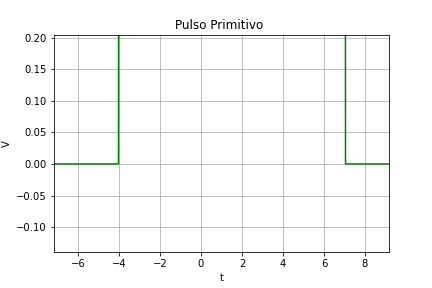

Text(0.5, 1.0, 'Pulso Primitivo ')

In [79]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(t, P_raa, '-g')
#plt.plot(t,P_proo,'-r')
#plt.plot(t,P_proo1,'-b')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo ')

# Sweeping function

In [8]:
def Sweep(Pump,Probe,δt):
    "Function to sweep the Probe pulse during a given time (for now given by the array t)." 
    "The function uses the pulses information given in their corresponding dictionaries"
    "Both pulses start a t=0, and the sweeping step is given by δt"
    "the output of the function is an array containing the different arrays of the probe pulse at their corresponding time t"
    p_pum = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    p_sw=np.array([p(Probe['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
    return p_pum, p_sw

In [ ]:
def mod():
    
    p_atas=np.array([p(Probe1['Amplitude']+Rabi['Amplitude'],t - (Probe1['Duration']/2)-i, Probe1['Duration']) if (t- Rabi['Duration']/2)-(t - (Probe1['Duration']/2)-i)==0  else p(Probe1['Amplitude'],t - (Probe1['Duration']/2)-i, Probe1['Duration'])  for i in range(Probe1['start time'],Probe1['end time'] + 1) ])

In [11]:
t.shape

(1000,)

In [10]:
ha,ber= Sweep(Rabi,Probe1,1)

In [11]:
ha2,ber2= Sweep(Rabi,Probe1,2)

In [12]:
ber2.shape

(11, 1000)

In [13]:
ber.shape

(21, 1000)

<IPython.core.display.Javascript object>


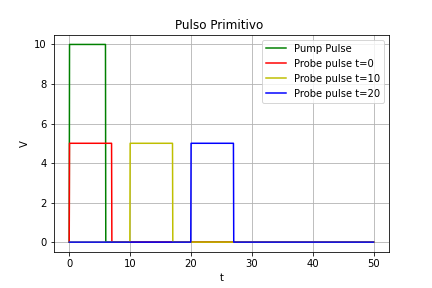

In [14]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(t, ha, '-g',label='Pump Pulse')
plt.plot(t,ber[0],'-r',label='Probe pulse t=0')
plt.plot(t,ber[10],'-y',label='Probe pulse t=10')
plt.plot(t,ber[20],'-b',label='Probe pulse t=20')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo ')
ax.legend(loc=0) 

<IPython.core.display.Javascript object>


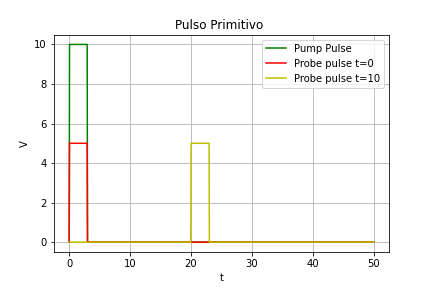

In [59]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(t, ha, '-g',label='Pump Pulse')
plt.plot(t,ber2[0],'-r',label='Probe pulse t=0')
plt.plot(t,ber2[10],'-y',label='Probe pulse t=10')
#plt.plot(t,ber[20],'-b',label='Probe pulse t=20')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo ')
ax.legend(loc=0) 

In [20]:
P_ani=np.array( p(Rabi['Amplitude'],t- Rabi['Duration']/2 , Rabi['Duration']))

<IPython.core.display.Javascript object>


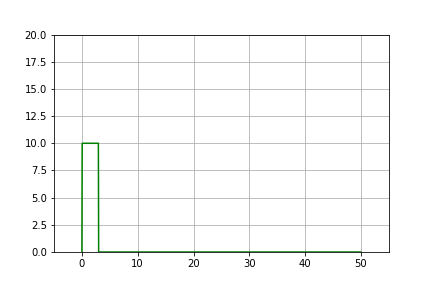

In [26]:
# First set up the figure, the axis, and the plot element we want to animate
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-5, 55), ylim=(0, 20))
ax.grid(True)
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = t
    y = p(Probe1['Amplitude'],t - (Rabi['Duration']-2) - (1*i)  , Probe1['Duration'])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=30, blit=True)
plt.plot(t, P_ani, '-g')
plt.show()

# ?

In [16]:
def Sweep3(Pump,Probe,δt):
    "Function to sweep the Probe pulse during a given time (for now given by the array t)." 
    "The function uses the pulses information given in their corresponding dictionaries"
    "Both pulses start a t=0, and the sweeping step is given by δt"
    "the output of the function is an array containing the different arrays of the probe pulse at their corresponding time t"
    p_pum = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    time=np.linspace(0, 50, 1000)
    for x in time:
        if (x- Pump['Duration']/2)-(x - (Probe['Duration']/2)-x)== 0 :
            p_sw=np.array([p(Probe['Amplitude']+Pump['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
            return p_pum, p_sw
        else:          
            p_sw=np.array([p(Probe['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
            return p_pum, p_sw

In [9]:
def Sweep(Pump,Probe,δt):
    "Function to sweep the Probe pulse during a given time (for now given by the array t)." 
    "The function uses the pulses information given in their corresponding dictionaries"
    "Both pulses start a t=0, and the sweeping step is given by δt"
    "the output of the function is an array containing the different arrays of the probe pulse at their corresponding time t"
    p_pum = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    p_sw=np.array([p(Probe['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
    return p_pum, p_sw

In [22]:
def Sweep3(Pump,Probe,δt):
    "Function to sweep the Probe pulse during a given time (for now given by the array t)." 
    "The function uses the pulses information given in their corresponding dictionaries"
    "Both pulses start a t=0, and the sweeping step is given by δt"
    "the output of the function is an array containing the different arrays of the probe pulse at their corresponding time t"
    p_pum = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    p_dif = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    p_cat = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    time=np.linspace(0, 50, 1000)
    for x in time:
        if (x- Pump['Duration']/2)-(x - (Probe['Duration']/2)-x)== 0 :
            p_sw=np.array([p(Probe['Amplitude']+Pump['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
            return p_sw
        else:          
            p_sw=np.array([p(Probe['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
            return p_sw
    return p_pum, p_sw

In [80]:
def Sweep4(Pump,Probe,δt):
    "Function to sweep the Probe pulse during a given time (for now given by the array t)." 
    "The function uses the pulses information given in their corresponding dictionaries"
    "Both pulses start a t=0, and the sweeping step is given by δt"
    "the output of the function is an array containing the different arrays of the probe pulse at their corresponding time t"
    p_pum = np.array( p(Pump['Amplitude'],t- Pump['Duration']/2 , Pump['Duration']))
    p_sw=np.array([p(Probe['Amplitude'],t - (Probe['Duration']/2)-i, Probe['Duration']) for i in range(Probe['start time'],Probe['end time'] + 1,δt) ])
    p_ov=np.array([((1- Pump['Duration']/2)-(x- (Probe['Duration']/2))) for x in range(Probe['start time'],Probe['end time'] + 1,δt) ])
    return p_pum, p_sw, p_ov

In [ ]:
def zon(Pump,t):
    
    

In [3]:
#length of the scheme, now fixed to 1000
Da = np.linspace(0, 50, 1000)
#step in time δt :
#δt=1

In [11]:
def duration(Pulse,time):
    "creates an array with the same time step as the time interval, but only for the duration of the pulse"
    du = time[time <= Pulse['Duration']]
    return du

In [13]:
du_pump=duration(Rabi,t);
du_probe=duration(Probe1,t);

In [14]:
du_probe

array([0.        , 0.05005005, 0.1001001 , 0.15015015, 0.2002002 ,
       0.25025025, 0.3003003 , 0.35035035, 0.4004004 , 0.45045045,
       0.5005005 , 0.55055055, 0.6006006 , 0.65065065, 0.7007007 ,
       0.75075075, 0.8008008 , 0.85085085, 0.9009009 , 0.95095095,
       1.001001  , 1.05105105, 1.1011011 , 1.15115115, 1.2012012 ,
       1.25125125, 1.3013013 , 1.35135135, 1.4014014 , 1.45145145,
       1.5015015 , 1.55155155, 1.6016016 , 1.65165165, 1.7017017 ,
       1.75175175, 1.8018018 , 1.85185185, 1.9019019 , 1.95195195,
       2.002002  , 2.05205205, 2.1021021 , 2.15215215, 2.2022022 ,
       2.25225225, 2.3023023 , 2.35235235, 2.4024024 , 2.45245245,
       2.5025025 , 2.55255255, 2.6026026 , 2.65265265, 2.7027027 ,
       2.75275275, 2.8028028 , 2.85285285, 2.9029029 , 2.95295295,
       3.003003  , 3.05305305, 3.1031031 , 3.15315315, 3.2032032 ,
       3.25325325, 3.3033033 , 3.35335335, 3.4034034 , 3.45345345,
       3.5035035 , 3.55355355, 3.6036036 , 3.65365365, 3.70370

In [16]:
du_pump

array([0.        , 0.05005005, 0.1001001 , 0.15015015, 0.2002002 ,
       0.25025025, 0.3003003 , 0.35035035, 0.4004004 , 0.45045045,
       0.5005005 , 0.55055055, 0.6006006 , 0.65065065, 0.7007007 ,
       0.75075075, 0.8008008 , 0.85085085, 0.9009009 , 0.95095095,
       1.001001  , 1.05105105, 1.1011011 , 1.15115115, 1.2012012 ,
       1.25125125, 1.3013013 , 1.35135135, 1.4014014 , 1.45145145,
       1.5015015 , 1.55155155, 1.6016016 , 1.65165165, 1.7017017 ,
       1.75175175, 1.8018018 , 1.85185185, 1.9019019 , 1.95195195,
       2.002002  , 2.05205205, 2.1021021 , 2.15215215, 2.2022022 ,
       2.25225225, 2.3023023 , 2.35235235, 2.4024024 , 2.45245245,
       2.5025025 , 2.55255255, 2.6026026 , 2.65265265, 2.7027027 ,
       2.75275275, 2.8028028 , 2.85285285, 2.9029029 , 2.95295295,
       3.003003  , 3.05305305, 3.1031031 , 3.15315315, 3.2032032 ,
       3.25325325, 3.3033033 , 3.35335335, 3.4034034 , 3.45345345,
       3.5035035 , 3.55355355, 3.6036036 , 3.65365365, 3.70370

In [17]:
c = np.array([x ])

<ipython-input-17-f4aca75f9d9f>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  c = du_pump == du_probe


In [19]:
print(c)

False


In [96]:
for x in t:
    if x in range(0,Rabi['Duration']):
        print(x)

0.0


In [86]:
range(0,Rabi['Duration'])

range(0, 6)

In [81]:
a, b ,c= Sweep4(Rabi,Probe2,1)

In [84]:
c

array([  6.,   5.,   4.,   3.,   2.,   1.,   0.,  -1.,  -2.,  -3.,  -4.,
        -5.,  -6.,  -7.,  -8.,  -9., -10., -11., -12., -13., -14.])

In [37]:
c.shape

(21,)

In [44]:
a

array([ 0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [36]:
b.shape

(21, 1000)

<IPython.core.display.Javascript object>


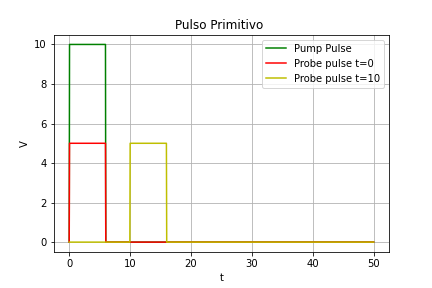

In [67]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(t, a, '-g',label='Pump Pulse')
plt.plot(t,b[0],'-r',label='Probe pulse t=0')
plt.plot(t,b[10],'-y',label='Probe pulse t=10')
#plt.plot(t,ber[20],'-b',label='Probe pulse t=20')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo ')
ax.legend(loc=0) 

In [32]:
c

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5])

In [29]:
np.concatenate((a,b))

array([1, 2, 3, 4, 5, 6])

<IPython.core.display.Javascript object>


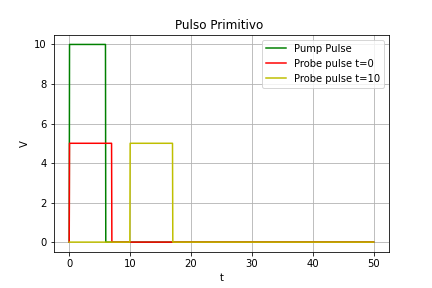

In [18]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(t, ha, '-g',label='Pump Pulse')
plt.plot(t,ber3[0],'-r',label='Probe pulse t=0')
plt.plot(t,ber[10],'-y',label='Probe pulse t=10')
#plt.plot(t,ber[20],'-b',label='Probe pulse t=20')
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title('Pulso Primitivo ')
ax.legend(loc=0) 

To do:

-move to arbitrary staarting position given by start/end time 
-overlap of pulses should give an additive amplitude

duration= abs(end time - start time)

In T. code, start/end duration and start/end time ?

TypeError: unsupported operand type(s) for -: 'str' and 'str'